In [1]:
# Import Libraries
%matplotlib inline
#Module to handle regular expressions
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
# Ignore Warning
import warnings 
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
# File paths
pred_data_file = os.path.join("..","Resources","outputData","tweetCleanData.csv")

In [3]:
# Load Tweeter data file
df_pred = pd.read_csv(pred_data_file)

In [4]:
# Display sample results
df_pred.head()

,Date,TweetID,Tweet,Matched Keywords,User,Source,Followers,Friends,Favorite,OrgTweet,Sentiment
0,8/10/2020 12:11,1.292800e+18,even right certain kind liberal deeply wants g...,Trump,MenshevikM,Twitter Web App,5882.0,320.0,0.0,They're even right that there's a certain kind...,Positive
1,8/10/2020 12:11,1.292800e+18,press people encouraged voters vote trump like...,Trump,balling_it,Twitter Web App,33.0,156.0,0.0,"@jonathanchait Naw, that is the press, people ...",Positive
2,8/10/2020 12:11,1.292800e+18,trump signs executive order throw rotted scrap...,Trump,laurie71,Twitter for iPhone,85.0,141.0,0.0,@sarahcpr Trump signs an executive order to th...,Negative
3,8/10/2020 12:11,1.292800e+18,sorry want real team truthful team justice tea...,Biden,bluewave4peace,Twitter for iPhone,528.0,745.0,0.0,@glennkirschner2 Sorry I want to be on a real ...,Positive
4,8/10/2020 12:11,1.292800e+18,yeah sase cowers yelps befor jumping embarrass...,Trump,OGOPer,Twitter for iPhone,2839.0,2655.0,0.0,Yeah. Until Ben Sasse cowers and yelps befor j...,Negative


## Data Visualization

#### We can get a good idea of general sentiment statistics across different tweet categories. Looks like the average sentiment is  negative for Trump and reasonably positive for Biden! 

In [5]:
#Vectorization for Data Visualization
def vectorization(table):
    #CountVectorizer will convert a collection of text documents to a matrix of token counts
    #Produces a sparse representation of the counts 
    #Initialize
    vector = CountVectorizer()
    #We fit and transform the vector created
    frequency_matrix = vector.fit_transform(table.Tweet)
    #Sum all the frequencies for each word
    sum_frequencies = np.sum(frequency_matrix, axis=0)
    #Now we use squeeze to remove single-dimensional entries from the shape of an array that we got from applying np.asarray to
    #the sum of frequencies.
    frequency = np.squeeze(np.asarray(sum_frequencies))
    #Now we get into a dataframe all the frequencies and the words that they correspond to
    frequency_df = pd.DataFrame([frequency], columns=vector.get_feature_names()).transpose()
    return frequency_df

In [6]:
def graph(word_frequency, sent):
    labels = word_frequency[0][1:51].index
    title = "Word Frequency for %s" %sent
    #Plot the figures
    plt.figure(figsize=(10,5))
    plt.bar(np.arange(50), word_frequency[0][1:51], width = 0.8, color = sns.color_palette("bwr"), alpha=0.5, 
            edgecolor = "black", capsize=8, linewidth=1);
    plt.xticks(np.arange(50), labels, rotation=90, size=14);
    plt.xlabel("50 more frequent words", size=14);
    plt.ylabel("Frequency", size=14);
    #plt.title('Word Frequency for %s', size=18) %sent;
    plt.title(title, size=18)
    plt.grid(False);
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);
    plt.show() 

In [7]:
def regression_graph(table,lable):
    table = table[1:]
    #We set the style of seaborn
    sns.set_style("whitegrid")   
    #Initialize the figure
    plt.figure(figsize=(6,6))
    
    #we obtain the points from matplotlib scatter
    points = plt.scatter(table["Positive"], table["Negative"], c=table["Positive"], s=75, cmap="bwr")
    #graph the colorbar
    plt.colorbar(points)
    #we graph the regplot from seaborn
    sns.regplot(x="Positive", y="Negative",fit_reg=False, scatter=False, color=".1", data=table)
    plt.xlabel("Frequency for Positive Tweets", size=10)
    plt.ylabel("Frequency for Negative Tweets", size=10)
    plt.title("Word frequency in Positive vs. Negative Tweets for "+ lable +"\n\n", size=12)
    plt.grid(False)
    sns.despine()

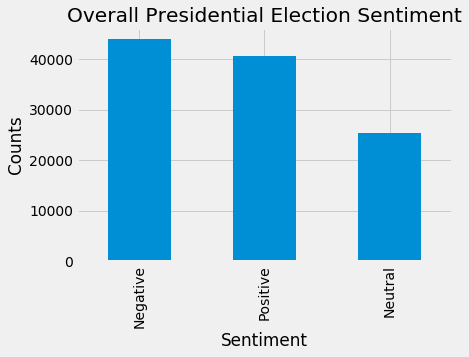

In [8]:
# Plotting and visualizing the counts
plt.title('Overall Presidential Election Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_pred['Sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [9]:
# Trump df
df_trump = df_pred[df_pred['Matched Keywords']=='Trump']

In [10]:
# Biden df
df_biden = df_pred[df_pred['Matched Keywords']=='Biden']

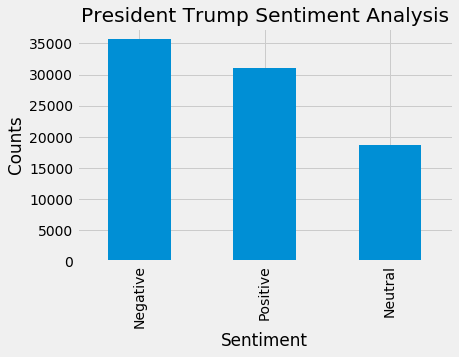

In [11]:
# Plotting and visualizing the counts
plt.title('President Trump Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_trump['Sentiment'].value_counts().plot(kind = 'bar')
plt.show()

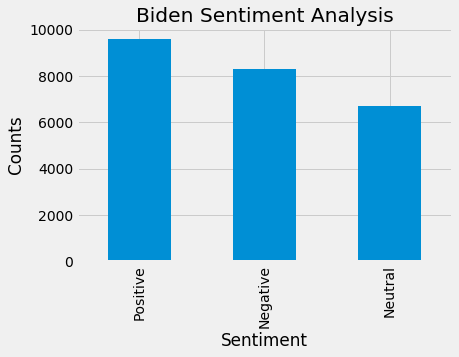

In [12]:
# Plotting and visualizing the counts
plt.title('Biden Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_biden['Sentiment'].value_counts().plot(kind = 'bar')
plt.show()

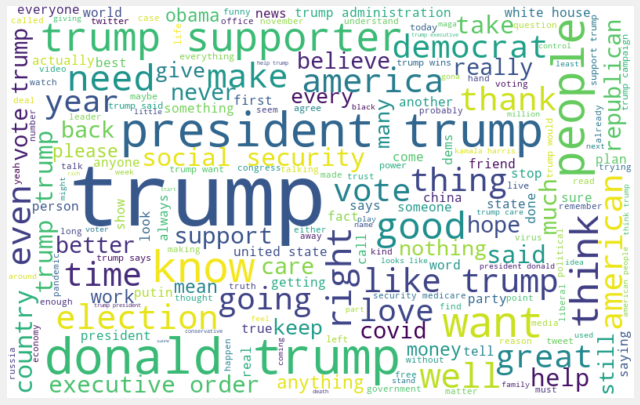

In [13]:
# Word Cloud for President Trump - Positive
all_words = pd.Series([t for t in df_trump[df_trump.Sentiment == "Positive"].Tweet]).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=500, background_color='white', random_state=420, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

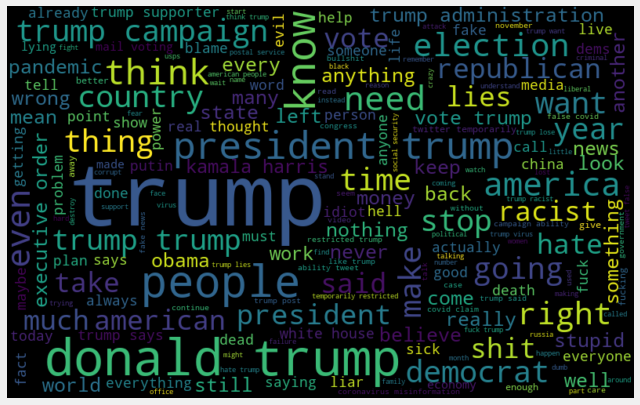

In [14]:
# Word Cloud for President Trump - Positive
all_words = pd.Series([t for t in df_trump[df_trump.Sentiment == "Negative"].Tweet]).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=500, background_color='black', random_state=420, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

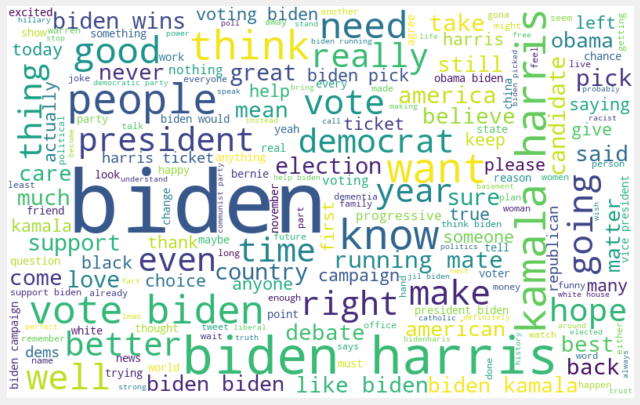

In [15]:
# Word Cloud for Biden - Positive
all_words = pd.Series([t for t in df_biden[df_biden.Sentiment == "Positive"].Tweet]).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=500, background_color='white', random_state=420, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

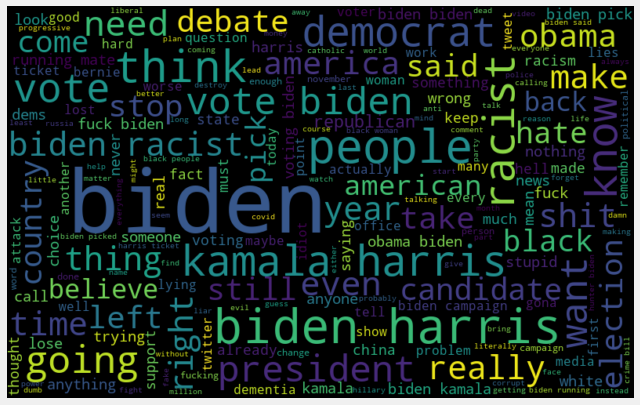

In [16]:
# Word Cloud for Biden - Negative
all_words = pd.Series([t for t in df_biden[df_biden.Sentiment == "Negative"].Tweet]).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=500, background_color='black', random_state=420, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

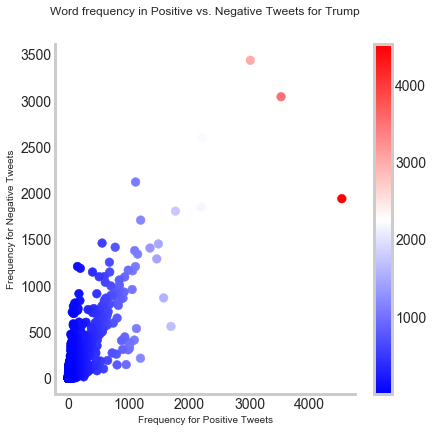

In [17]:
#Get the frequency
word_frequency_pos_trump = vectorization(df_trump[df_trump['Sentiment'] == 'Positive']).sort_values(0, ascending = False)
word_frequency_neg_trump = vectorization(df_trump[df_trump['Sentiment'] == 'Negative']).sort_values(0, ascending = False)

#Concatenate word frequency for positive and negative
table_regression = pd.concat([word_frequency_pos_trump, word_frequency_neg_trump], axis=1, sort=False)
table_regression.columns = ["Positive", "Negative"]
regression_graph(table_regression, "Trump")

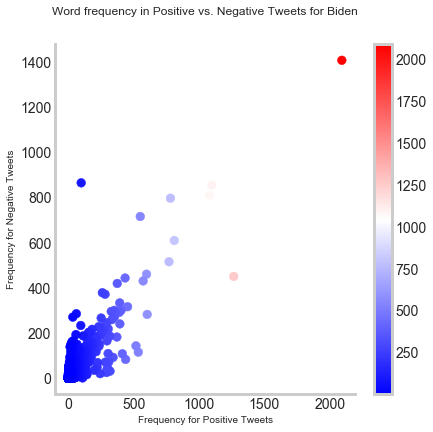

In [18]:
#Get the frequency
word_frequency_pos_biden = vectorization(df_biden[df_biden['Sentiment'] == 'Positive']).sort_values(0, ascending = False)
word_frequency_neg_biden = vectorization(df_biden[df_biden['Sentiment'] == 'Negative']).sort_values(0, ascending = False)

#Concatenate word frequency for positive and negative
table_regression = pd.concat([word_frequency_pos_biden, word_frequency_neg_biden], axis=1, sort=False)
table_regression.columns = ["Positive", "Negative"]
regression_graph(table_regression, "Biden")

In [19]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [20]:
# Get encoded sentiment
df_pred['encodePrediction'] = labelencoder.fit_transform(df_pred['Sentiment'])

Text(0.5, 1, 'Presidential Election Tweet Sentiment')

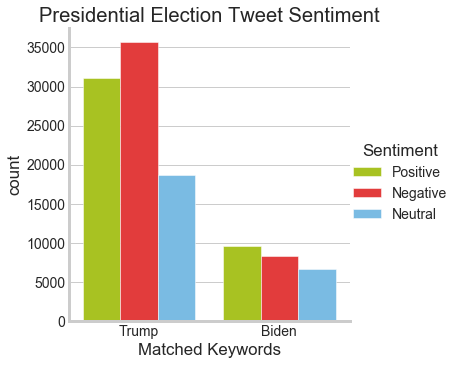

In [21]:
# Frequency sentiment chart
fc = sns.catplot(x="Matched Keywords", hue="Sentiment", 
                    data=df_pred, kind="count", 
                    palette={"Negative": "#FE2020", 
                             "Positive": "#BADD07", 
                             "Neutral": "#68BFF5"})
plt.title("Presidential Election Tweet Sentiment")

In [22]:
# Intital counter for sentiment
positive=0
negative=0
neutral=0
TrumpCount=len(df_trump['Sentiment'])
BidenCount=len(df_biden['Sentiment'])

In [23]:
# Sentiment pie-chart
def getSentiments(tag,tweets,count):
    # reset counter for sentiment
    positive=0
    negative=0
    neutral=0
    positive_per=0
    neutral_per=0
    negative_per=0
    
    # Loop through tweets and get sentiment polarity
    for pred in tweets:
        
        if(pred =='Positive'):
            positive+=1
        elif(pred =='Negative'):
            negative+=1
        else:
            neutral+=1
            

    labels =['Positive','Neutral','Negative']    
    # Sizes
    sizes=[positive,neutral,negative]
    # Colors
    colors=['yellowgreen','gold','red']
    
    #Explode
    explode = (0.1, 0, 0)  # explode 1st slice
    
    fig = plt.figure(figsize=[6,6])
    ax = fig.add_subplot(111)
    
    # Draw pie chart to show sentiments for the tweets
    plt.pie(sizes, labels=labels, colors=colors,explode=explode,
            shadow=True, startangle=140, autopct='%1.0f%%', labeldistance=1.2)
    plt.title("Tweet sentiment for " + tag )
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

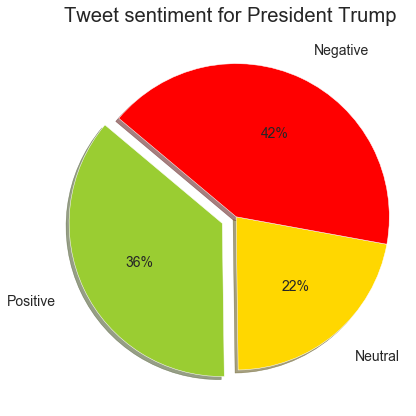

In [24]:
# Sentiment pie-chart for President Trump
getSentiments("President Trump", df_trump['Sentiment'],TrumpCount)

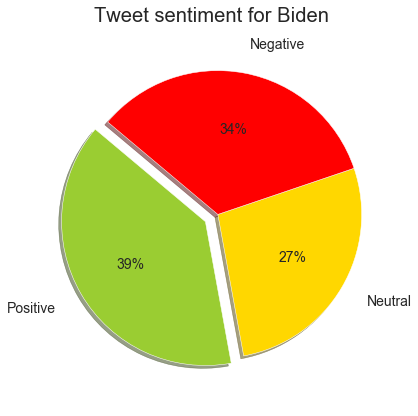

In [25]:
# Sentiment pie-chart for Biden
getSentiments("Biden", df_biden['Sentiment'],BidenCount)

In [26]:
# End of Data Visualization